# Supervised Learning
## **Visualizing Linear Regression Step by Step**
### Author: Mohammed A. Shehab

---

## **Introduction**
This notebook demonstrates how Linear Regression works through the following steps:
1. Generate synthetic data.
2. Visualize the dataset.
3. Initialize a linear model and fit it using gradient descent.
4. Visualize the fitting process step by step.

---


In [1]:
# **Step 1: Import Required Libraries**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Set a random seed for reproducibility
np.random.seed(42)


### Generate Synthetic Data

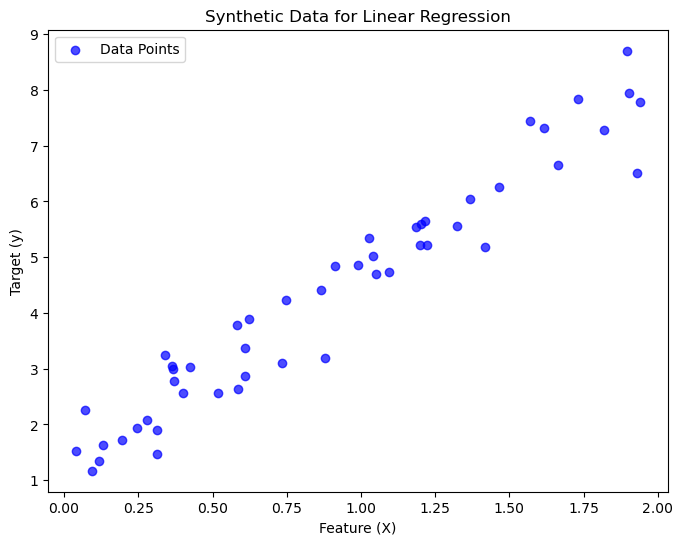

In [2]:
n_samples = 50
X = 2 * np.random.rand(n_samples, 1)  # Random features
true_slope = 3.5
true_intercept = 1.2
noise = np.random.randn(n_samples, 1) * 0.55  # Add noise to data
y = true_slope * X + true_intercept + noise  # True relationship with noise

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label="Data Points")
plt.title("Synthetic Data for Linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

### Define the Linear Regression Model

In [3]:
# Linear model: y = w * X + b
def predict(X, w, b):
    return w * X + b

# Define the Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent Function
def gradient_descent(X, y, w, b, learning_rate):
    n = len(y)
    y_pred = predict(X, w, b)
    error = y_pred - y
    
    # Gradients for weights and bias
    dw = (2 / n) * np.sum(error * X)
    db = (2 / n) * np.sum(error)
    
    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db
    
    return w, b

### Train the Linear Regression Model Step by Step

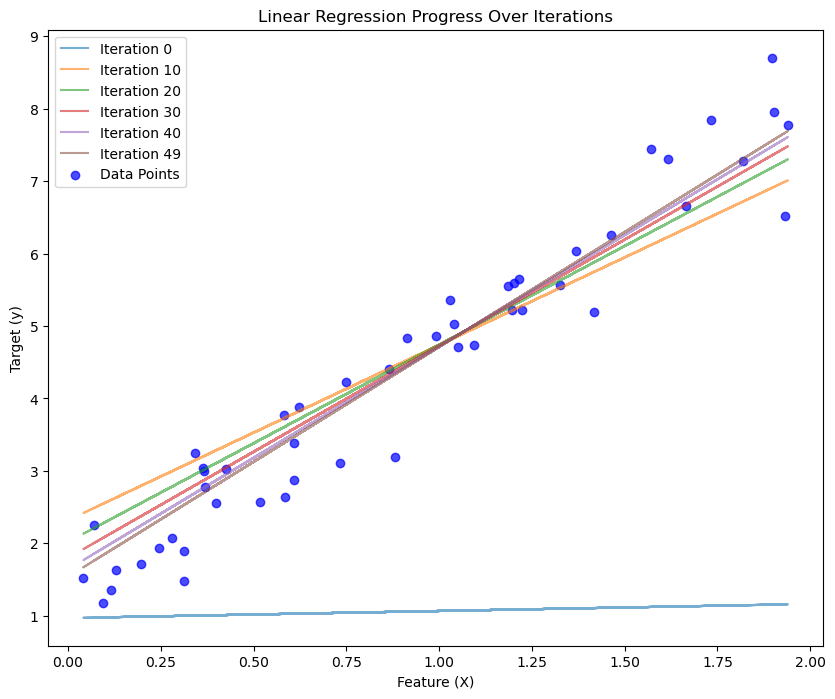

In [4]:
# Initialize weights, bias, and hyperparameters
w = np.random.randn()  # Random initialization of weight
b = np.random.randn()  # Random initialization of bias
learning_rate = 0.1
n_iterations = 50

# Arrays to store progress
mse_history = []
w_history = []
b_history = []

# Plotting setup
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='blue', alpha=0.7, label="Data Points")
plt.title("Linear Regression Progress Over Iterations")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")

# Gradient Descent Iterations
for i in range(n_iterations):
    # Calculate predictions and update parameters
    y_pred = predict(X, w, b)
    mse = mean_squared_error(y, y_pred)
    mse_history.append(mse)
    w_history.append(w)
    b_history.append(b)
    
    # Perform gradient descent
    w, b = gradient_descent(X, y, w, b, learning_rate)
    
    # Plot the line at specific iterations
    if i % 10 == 0 or i == n_iterations - 1:
        plt.plot(X, y_pred, label=f"Iteration {i}", alpha=0.6)

plt.legend()
plt.show()


### Visualize MSE Over Iterations

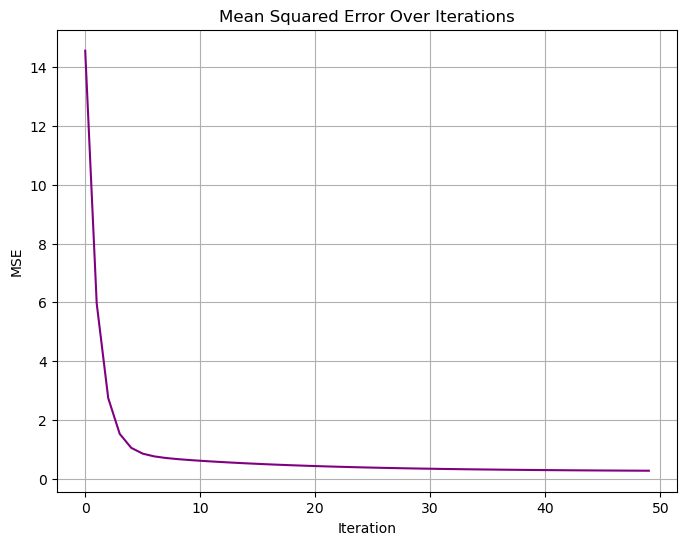

Final Weight (w): 3.180647420322735
Final Bias (b): 1.5294120446989723


In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), mse_history, color='purple')
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid()
plt.show()

# Final Parameters
print(f"Final Weight (w): {w}")
print(f"Final Bias (b): {b}")

# **Visualizing Logistic Regression Step by Step**


### Define the Logistic Regression Model

In [6]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Prediction
def predict(X, w, b):
    return sigmoid(w * X + b)

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, w, b, learning_rate):
    n = len(X)  # Number of samples
    y_pred = predict(X, w, b)
    error = y_pred - y

    # Gradients
    dw = (1 / n) * np.dot(X, error)
    db = (1 / n) * np.sum(error)

    # Update weights and bias
    w -= learning_rate * dw
    b -= learning_rate * db

    return w, b

### Generate Synthetic Data for Classification

In [7]:
# Generate data using make_classification
X, y = make_classification(
    n_samples=1_000,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=5.5,
    random_state=42
)
X = X.flatten()  # Flatten X for simplicity with single feature


### Train Logistic Regression and Visualize Progress

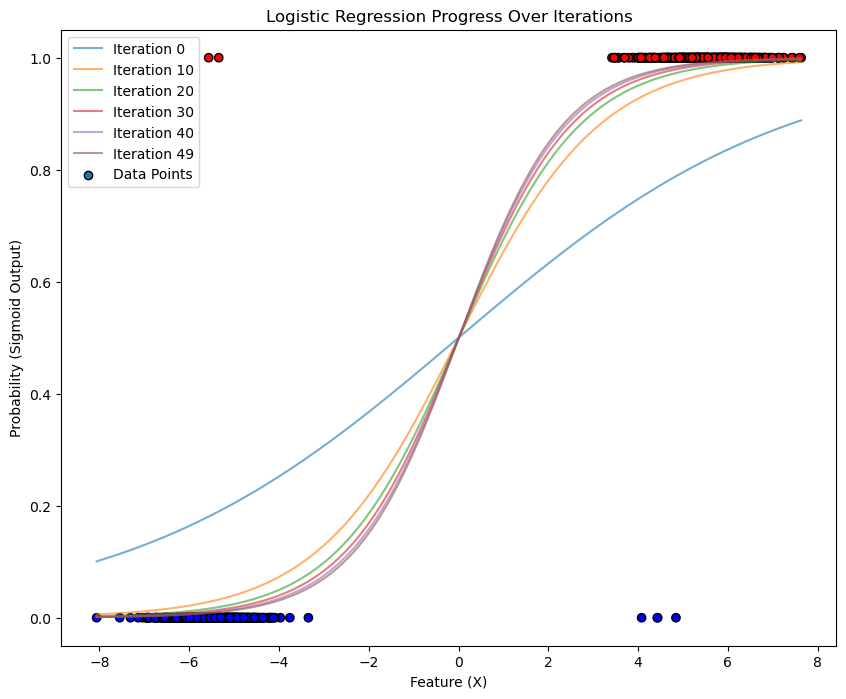

Final Weight (w): 0.8605639104338951
Final Bias (b): -0.006438289754420621


In [8]:
# Initialize parameters
w = 0.0  # Scalar weight
b = 0.0  # Scalar bias
learning_rate = 0.1
n_iterations = 50

# Plotting setup
plt.figure(figsize=(10, 8))
plt.scatter(X, y, c=y, cmap="bwr", edgecolor="k", label="Data Points")
plt.title("Logistic Regression Progress Over Iterations")
plt.xlabel("Feature (X)")
plt.ylabel("Probability (Sigmoid Output)")
# Track MSE values
mse_values = []
# Gradient Descent Iterations
for i in range(n_iterations):
    # Make predictions and compute loss
    y_pred = predict(X, w, b)
    loss = binary_cross_entropy(y, y_pred)
    # Compute MSE and store it
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)
    # Perform gradient descent
    w, b = gradient_descent(X, y, w, b, learning_rate)

    # Plot sigmoid curve at specific iterations
    if i % 10 == 0 or i == n_iterations - 1:
        x_values = np.linspace(X.min(), X.max(), 200)
        y_curve = sigmoid(w * x_values + b)
        plt.plot(x_values, y_curve, label=f"Iteration {i}", alpha=0.6)

plt.legend()
plt.show()

# Final weights and bias
print(f"Final Weight (w): {w}")
print(f"Final Bias (b): {b}")

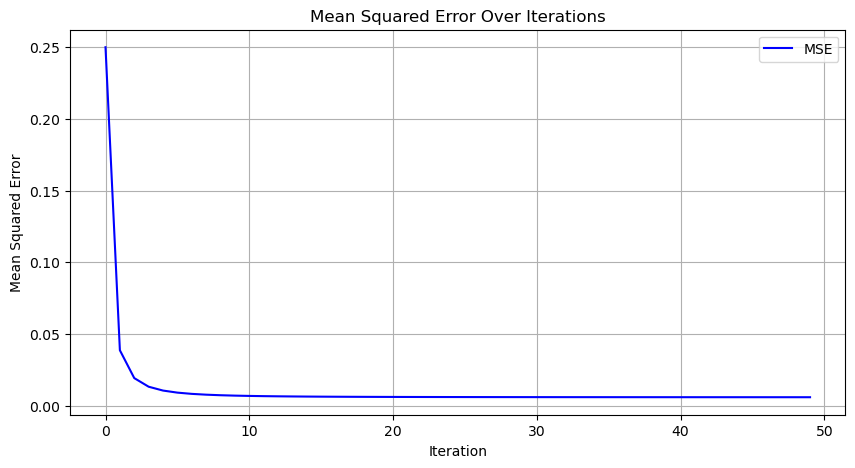

In [9]:
# Plot MSE Over Iterations
plt.figure(figsize=(10, 5))
plt.plot(range(n_iterations), mse_values, label="MSE", color="blue")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()
plt.show()

## Let's work with more compliex data

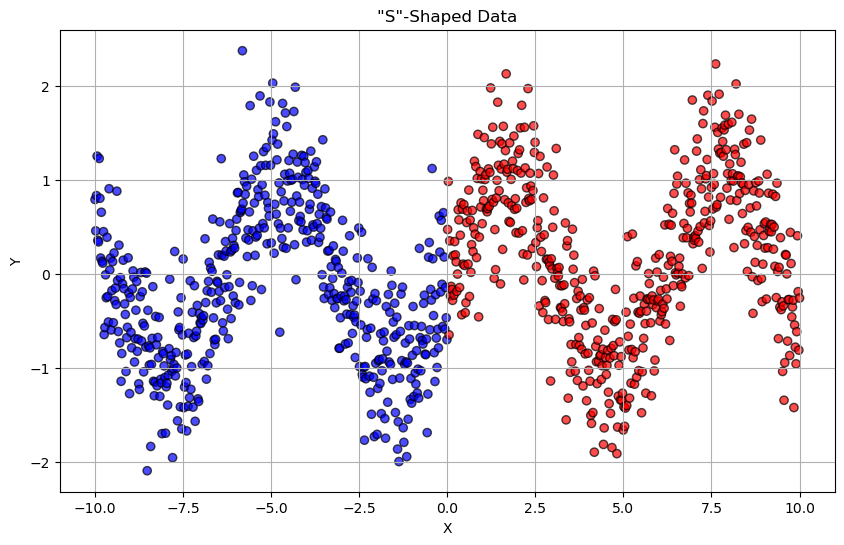

In [10]:


# Generate "S"-shaped data
np.random.seed(42)
n_samples = 1000
X = np.linspace(-10, 10, n_samples).reshape(-1, 1)  # Feature matrix (2D for sklearn)
y_continuous = np.sin(X).flatten() + np.random.normal(scale=0.5, size=n_samples)  # Continuous target
labels = (X.flatten() > 0).astype(int)  # Classification labels
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X,y_continuous, c=labels, cmap="bwr", edgecolor="k", alpha=0.7)
plt.title('"S"-Shaped Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

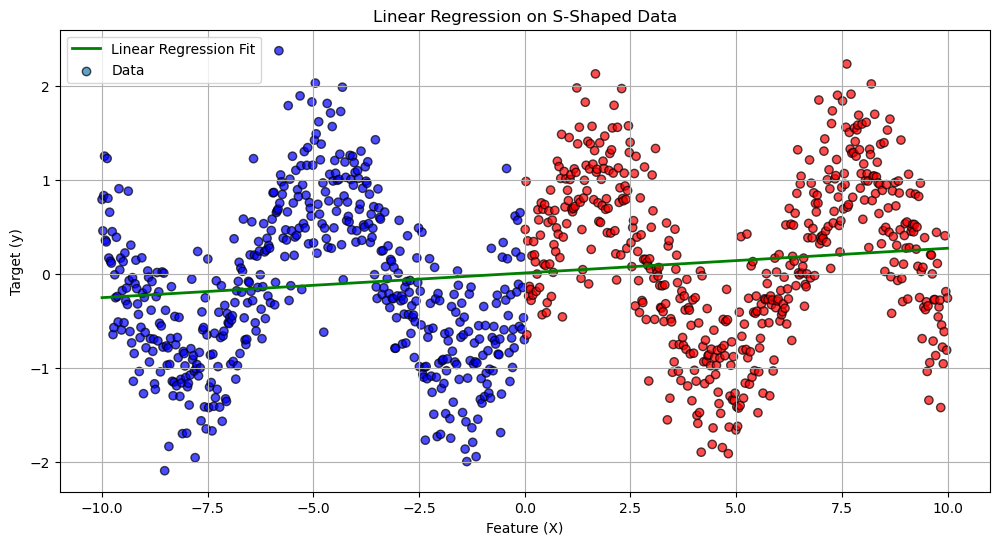

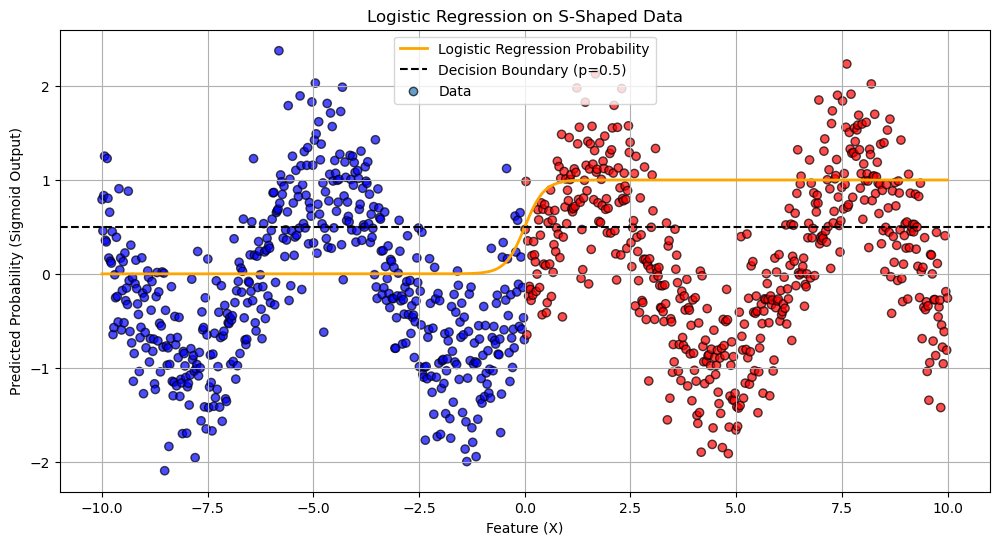

In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y_continuous)
y_linear_pred = linear_model.predict(X)

# Fit Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X, labels)
y_logistic_prob = logistic_model.predict_proba(X)[:, 1]  # Probability for class 1
y_logistic_pred = logistic_model.predict(X)

# Visualization: Linear Regression
plt.figure(figsize=(12, 6))

# Plot original data
plt.scatter(X, y_continuous, c=labels, cmap="bwr", edgecolor="k", alpha=0.7, label="Data")
plt.plot(X, y_linear_pred, color="green", label="Linear Regression Fit", linewidth=2)

plt.title("Linear Regression on S-Shaped Data")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Logistic Regression
plt.figure(figsize=(12, 6))

# Plot original data with classification boundary
plt.scatter(X, y_continuous, c=labels, cmap="bwr", edgecolor="k", alpha=0.7, label="Data")
plt.plot(X, y_logistic_prob, color="orange", label="Logistic Regression Probability", linewidth=2)
plt.axhline(0.5, color="black", linestyle="--", label="Decision Boundary (p=0.5)")

plt.title("Logistic Regression on S-Shaped Data")
plt.xlabel("Feature (X)")
plt.ylabel("Predicted Probability (Sigmoid Output)")
plt.legend()
plt.grid(True)
plt.show()